# Imports

In [93]:
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import numpy
from scipy.stats import sem

Load Data

In [3]:
iris = datasets.load_iris()

In [4]:
print(iris.data.shape)

(150, 4)


In [5]:
print(iris.target.shape)

(150,)


In [7]:
print(iris.data[0], iris.target[1])

[ 5.1  3.5  1.4  0.2] 0


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [11]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


## Split into Test and Train

In [14]:
X, Y = iris.data[:, :2], iris.target

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=66)

## Scale the X-data

In [18]:
scaler = preprocessing.StandardScaler().fit(X)

In [19]:
x_train = scaler.transform(x_train)

In [20]:
x_test = scaler.transform(x_test)

## Plot

In [52]:
colors = 'r w b'.split()

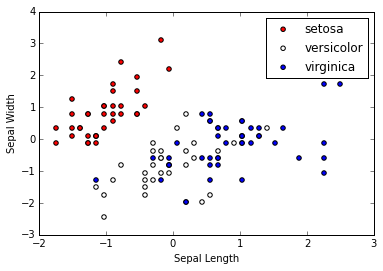

In [55]:
fig = plt.figure()
axe = fig.gca()
# separate by flower type
handles = []
for target in range(len(colors)):
    xs = x_train[:, 0][y_train == target]
    ys = x_train[:, 1][y_train == target]
    handles.append(axe.scatter(xs, ys, c=colors[target], label=iris.target_names[target]))

axe.legend(handles, iris.target_names, scatterpoints=1)
xl = axe.set_xlabel('Sepal Length')
yl = axe.set_ylabel('Sepal Width')

# Stochastic Gradient Descent

In [60]:
classifier = SGDClassifier()
classifier = classifier.fit(x_train, y_train)

In [61]:
print(classifier.coef_)

[[-22.20245135  12.6759546 ]
 [ -8.21257535 -11.07290648]
 [ 18.653168   -13.35873436]]


In [62]:
print(classifier.intercept_)

[-11.15155373  -9.08544534  -3.43205237]


There are three entries for the coefficents and intercepts because there are three targets, so it picks each target and fits a line that separates it from the other two categories.

## Plot the fit

In [75]:
x_min, x_max = x_train[:, 0].min() - .5, x_train[:, 0].max() + .5

In [76]:
y_min, y_max = x_train[:, 1].min() - .5, x_train[:,1].max() + .5

In [77]:
xs = numpy.arange(x_min, x_max, 0.5)

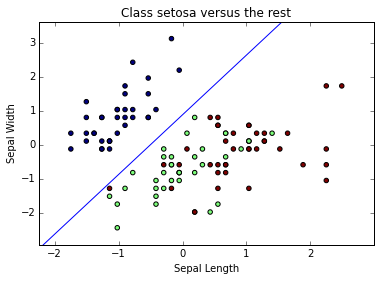

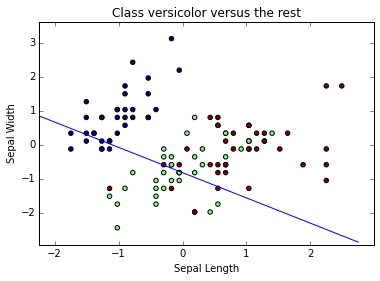

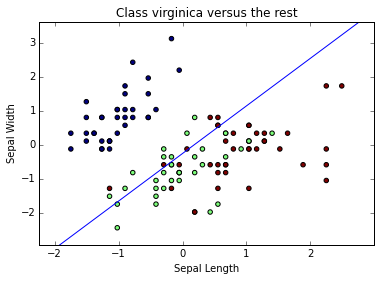

In [78]:
for plot in range(3):
    figure = plt.figure()
    axe = figure.gca()
    axe.set_title('Class {0} versus the rest'.format(iris.target_names[plot]))
    axe.set_xlabel('Sepal Length')
    axe.set_ylabel('Sepal Width')
    axe.set_xlim(x_min, x_max)
    axe.set_ylim(y_min, y_max)
    axe.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
    ys = (-classifier.intercept_[plot] - xs * classifier.coef_[plot, 0]) / classifier.coef_[plot, 1]
    axe.plot(xs, ys)

# Evaluating the Classifier

In [81]:
y_train_predict = classifier.predict(x_train)
print(metrics.accuracy_score(y_train, y_train_predict))

0.75


In [82]:
y_predict = classifier.predict(x_test)
print(metrics.accuracy_score(y_test, y_predict))

0.710526315789


In [85]:
print(metrics.classification_report(y_test, y_predict, target_names=iris.target_names))

             precision    recall  f1-score   support

     setosa       0.93      0.93      0.93        14
 versicolor       0.67      0.17      0.27        12
  virginica       0.57      1.00      0.73        12

avg / total       0.73      0.71      0.66        38



In [86]:
print(metrics.confusion_matrix(y_test, y_predict))

[[13  1  0]
 [ 1  2  9]
 [ 0  0 12]]


# Cross-Validation

In [90]:
classifier = Pipeline([('scaler', preprocessing.StandardScaler()),
                      ('linear_model', SGDClassifier())])

In [91]:
cross_validation = KFold(X.shape[0], 5, shuffle=True, random_state=666)
scores = cross_val_score(classifier, X, Y, cv=cross_validation)

In [92]:
print(scores)

[ 0.8         0.7         0.8         0.76666667  0.7       ]


In [94]:
print("Mean Score: {0:.3f} (+/- {1:.3f})".format(numpy.mean(scores), sem(scores)))

Mean Score: 0.753 (+/- 0.023)
